## Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_excel('PDataset4.xlsx')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])],
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))
#print(X)
#print (y)
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 71)

In [7]:
X_test1, X_val, y_test1, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 71)

## Calling the XGB Regressor

In [3]:
from xgboost import XGBRegressor
regressor = XGBRegressor(random_state = 71)

## Applying Grid Search to find the best model and the best parameters

In [32]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [1000,1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500],
               'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
               'gamma': [3, 2, 1, 0.1, 0.01, 0.001], 
               'learning_rate' : [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5] }]
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_parameters)

Best Accuracy: 0.9926506589574158
Best Parameters: {'gamma': 2, 'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 1100}


## Training the XGB Regression model on the Training set

In [15]:
from xgboost import XGBRegressor
regressor = XGBRegressor(n_estimators = 1400,
                         max_depth = 2,
                         gamma = 1, 
                         learning_rate = 0.2,
                         random_state = 71)
eval_set = [(X_train, y_train), (X_val, y_val)]
regressor.fit(X_train, y_train, eval_metric = ["mae"], eval_set=eval_set, verbose = True)

[0]	validation_0-mae:481.61616	validation_1-mae:463.73287
[1]	validation_0-mae:408.43127	validation_1-mae:394.48916
[2]	validation_0-mae:346.22107	validation_1-mae:332.54976
[3]	validation_0-mae:287.97021	validation_1-mae:267.32217
[4]	validation_0-mae:249.09086	validation_1-mae:234.86886
[5]	validation_0-mae:217.18374	validation_1-mae:207.75841
[6]	validation_0-mae:189.17285	validation_1-mae:184.69880
[7]	validation_0-mae:169.02031	validation_1-mae:165.97581
[8]	validation_0-mae:151.26242	validation_1-mae:151.85422
[9]	validation_0-mae:139.25117	validation_1-mae:139.75015
[10]	validation_0-mae:121.66205	validation_1-mae:124.53233
[11]	validation_0-mae:113.22496	validation_1-mae:116.25206
[12]	validation_0-mae:99.83426	validation_1-mae:105.79087
[13]	validation_0-mae:93.87127	validation_1-mae:104.83361
[14]	validation_0-mae:87.55142	validation_1-mae:100.96010
[15]	validation_0-mae:81.18567	validation_1-mae:98.06662
[16]	validation_0-mae:81.34059	validation_1-mae:99.99361
[17]	validatio

D:\Anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[111]	validation_0-mae:28.93441	validation_1-mae:41.86509
[112]	validation_0-mae:28.72928	validation_1-mae:41.54086
[113]	validation_0-mae:28.71348	validation_1-mae:41.56743
[114]	validation_0-mae:28.72436	validation_1-mae:41.57248
[115]	validation_0-mae:28.81010	validation_1-mae:41.73725
[116]	validation_0-mae:28.88972	validation_1-mae:41.73810
[117]	validation_0-mae:28.81651	validation_1-mae:41.73344
[118]	validation_0-mae:28.82866	validation_1-mae:41.73612
[119]	validation_0-mae:28.53422	validation_1-mae:41.61846
[120]	validation_0-mae:27.98268	validation_1-mae:41.18955
[121]	validation_0-mae:27.75001	validation_1-mae:41.03066
[122]	validation_0-mae:27.74785	validation_1-mae:41.01427
[123]	validation_0-mae:27.64690	validation_1-mae:40.90805
[124]	validation_0-mae:27.21186	validation_1-mae:40.55983
[125]	validation_0-mae:27.29875	validation_1-mae:40.74872
[126]	validation_0-mae:27.27323	validation_1-mae:40.66123
[127]	validation_0-mae:27.21595	validation_1-mae:40.65597
[128]	validati

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1400, n_jobs=None,
             num_parallel_tree=None, random_state=71, ...)

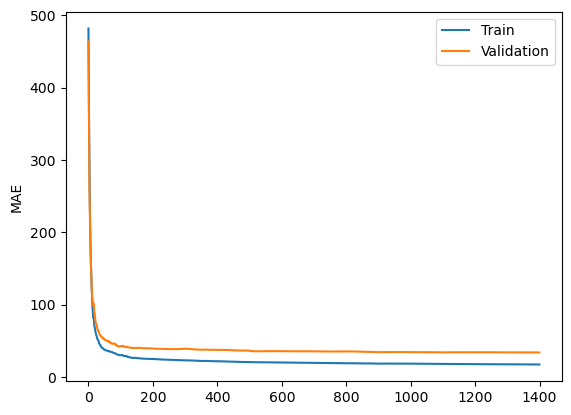

In [16]:
# retrieve performance metrics
results = regressor.evals_result()
epochs = len(results['validation_0']['mae'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mae'], label='Train')
ax.plot(x_axis, results['validation_1']['mae'], label='Validation')
ax.legend()
plt.ylabel('MAE')
plt.show()

## Create a KFold object with 5 splits 

In [ ]:
regressor.fit (X_train, y_train)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = False)
scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=folds)
print (scores)
print (scores.mean())


## Predicting the Test set results

In [17]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
file = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(file)

[[ 107.54  117.57]
 [1052.07  949.31]
 [ 206.26  200.22]
 [ 262.8   219.42]
 [ 100.04  112.12]
 [1588.86 1447.06]
 [ 130.53  150.68]
 [ 157.4   157.24]
 [  99.76  109.06]
 [ 721.34  724.54]
 [ 464.38  417.99]
 [ 137.12  118.26]
 [ 168.01  195.43]
 [1079.28 1113.99]
 [ 114.76  114.48]
 [ 121.7   115.74]
 [ 120.04  115.79]
 [ 204.23  197.38]
 [ 125.11  117.61]
 [  98.41  109.28]
 [ 578.74  626.02]
 [1099.03 1196.18]
 [ 117.72  110.56]
 [ 137.26  130.94]
 [ 114.76  112.99]
 [ 155.62  148.55]
 [ 122.71  119.54]
 [ 203.72  230.67]
 [  86.55  116.75]
 [ 121.23  126.05]
 [ 135.88  104.27]
 [3413.9  3327.9 ]
 [ 139.23  124.15]
 [ 176.88  171.84]
 [2120.47 2259.19]
 [ 109.83  123.17]
 [4535.02 4232.15]
 [ 174.03  167.83]
 [ 128.19  134.7 ]
 [ 114.51  114.12]
 [ 459.49  397.25]
 [ 320.16  324.37]
 [1537.22 1550.45]
 [ 386.82  403.13]
 [ 126.27  130.95]
 [ 107.48  120.33]
 [  70.07  132.34]
 [ 120.12  113.93]
 [ 291.59  261.17]
 [ 221.28  193.11]
 [ 134.13  137.57]
 [ 230.44  203.69]
 [ 129.95  1

## Evaluating the Model Performance

### R2

In [18]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9928515124739378


### Adj R2

In [19]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9926852685779828


### RMSE

In [20]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

108.61695862094801

### MAE

In [21]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

41.78583536128674

## Visualize

Text(0, 0.5, 'Predicted data')

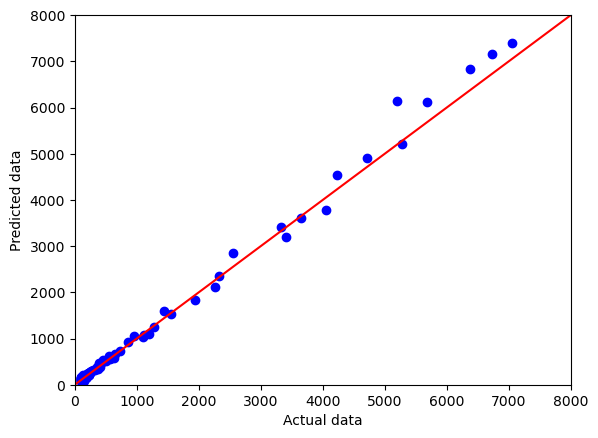

In [22]:
plt.scatter(y_test, y_pred, color="blue")
plt.plot ([0,8000],[0,8000], color = "red")
plt.axis ([0,8000,0,8000])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

## Error percentage visualization

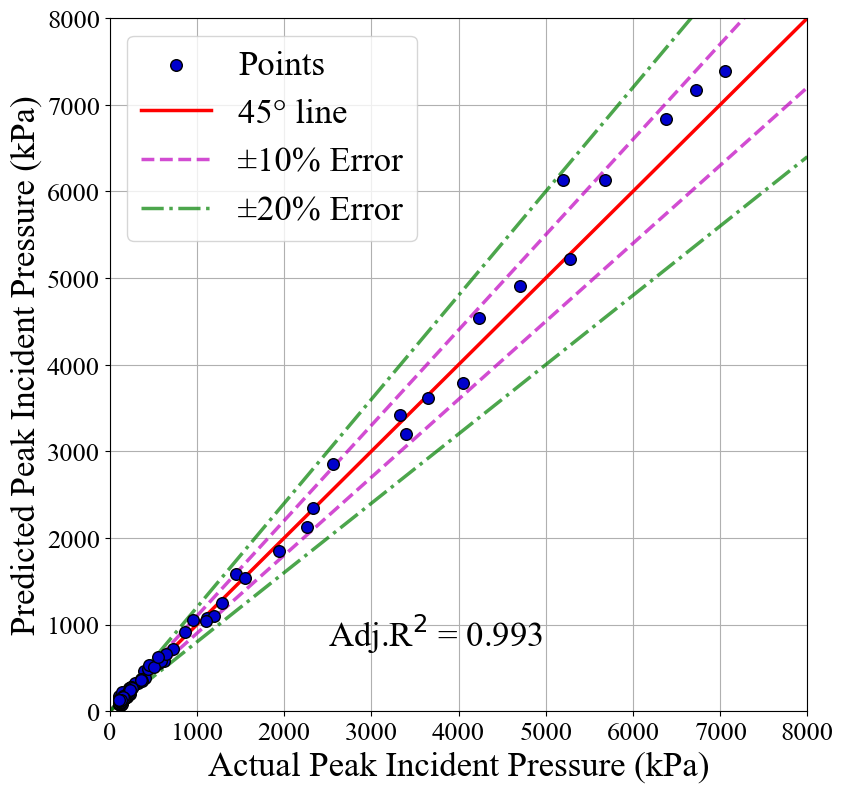

In [24]:
from sklearn.metrics import r2_score
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))


#y = y_pred         # Model on prvious line is called here
#x = y_test
# Set the font to New Times Roman for all elements
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']


# Add scatterplot
ax.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
# b, a = np.polyfit(x, y, deg=1)

# Create sequence of 50 numbers from 0 to 5 
#xseq = np.linspace(0, 5)



plt.ylabel('Predicted Peak Incident Pressure (kPa)',fontsize = 25)
plt.xlabel('Actual Peak Incident Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


# Plot regression line
# ax.plot(xseq, a + b * xseq, color="Red", lw=2.5,label='X=Y',alpha=1);


x1 = np.linspace(0,8000)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 8000)
plt.xlim(0, 8000)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax.annotate("$R^2$ = {:.3f}".format(r2), (2500, 1000),fontsize = 25)  #Model is called here
ax.annotate("Adj.R$^2$ = {:.3f}".format(adj_r2), (2500, 750),fontsize = 25)

plt.savefig('plotX1.png', dpi = 600, bbox_inches = 'tight')

## Error margins

In [26]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 10% margin 61.02%
Within 20% margin 92.66%
Out of 20% margin 7.34%


## <500 kPa

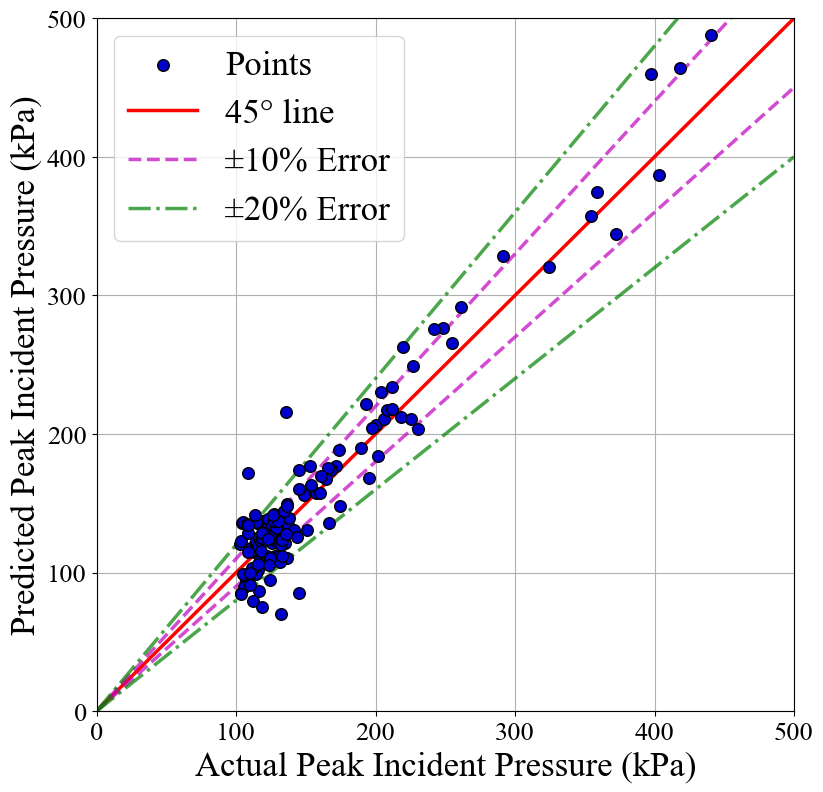

In [27]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, bx = plt.subplots(figsize = (9, 9))


#y = y_pred         # Model on prvious line is called here
#x = y_test
# Set the font to New Times Roman for all elements
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']


# Add scatterplot
bx.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
# b, a = np.polyfit(x, y, deg=1)

# Create sequence of 50 numbers from 0 to 5 
#xseq = np.linspace(0, 5)



plt.ylabel('Predicted Peak Incident Pressure (kPa)',fontsize = 25)
plt.xlabel('Actual Peak Incident Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


# Plot regression line
# ax.plot(xseq, a + b * xseq, color="Red", lw=2.5,label='X=Y',alpha=1);


x1 = np.linspace(0,500)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 500)
plt.xlim(0, 500)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax.annotate("$R^2$ = {:.3f}".format(r2_score(y_test, y_pred)), (300, 100),fontsize = 25)  #Model is called here

plt.savefig('plotX2.png', dpi = 600, bbox_inches = 'tight')

## Save the model to disk

In [ ]:
import pickle
filename = 'finalized_model_XGB.sav'
pickle.dump(regressor, open(filename, 'wb'))

## Make new predictions

In [ ]:
%%timeit -r 1 -n 1
comp_data = pd.read_excel('ForPaperComparison.xlsx')
print (comp_data)
#comp_data = np.array(ct.fit_transform(comp_data))
#print (comp_data)
comp_data_pred = regressor.predict(comp_data)
print (comp_data_pred)